In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df['label']=df['sentiment']

In [5]:
df=df.drop(['sentiment'],axis=1)

In [6]:
df

,review,label
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  50000 non-null  object
 1   label   50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
df.isnull().sum()

review    0
label     0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  50000 non-null  object
 1   label   50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [11]:
df=df[df['review']!="  "]

<AxesSubplot:xlabel='label', ylabel='count'>

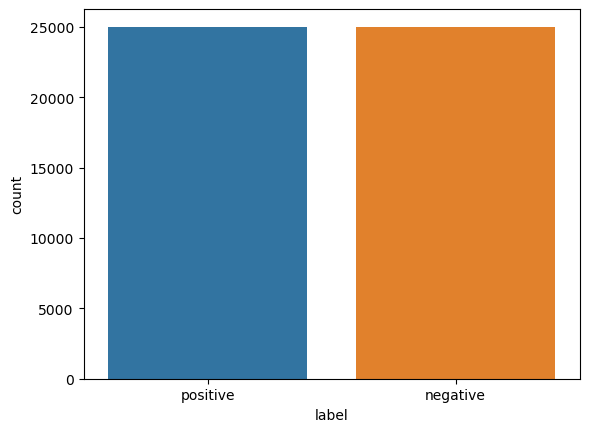

In [12]:
sns.countplot(data=df,x='label')

In [13]:
X=df['review']

In [14]:
y=df['label']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf=TfidfVectorizer()

In [20]:
tfidf.fit(X_train)

TfidfVectorizer()

In [21]:
X_train_tfidf=tfidf.transform(X_train)

In [22]:
X_test_tfidf=tfidf.transform(X_test)

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
nb=MultinomialNB()

In [25]:
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [26]:
pred=nb.predict(X_test_tfidf)

In [27]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    negative       0.84      0.89      0.86      4959
    positive       0.89      0.83      0.86      5041

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



C:\Users\sifta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


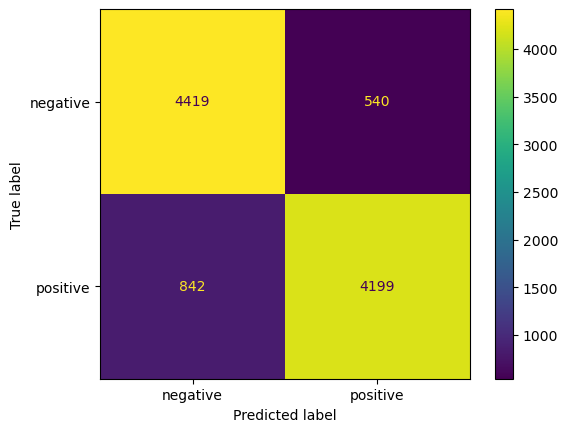

In [29]:
plot_confusion_matrix(nb,X_test_tfidf,y_test)

In [30]:
from sklearn.pipeline import Pipeline

In [31]:
from sklearn.svm import LinearSVC

In [32]:
linear_svc=LinearSVC()

In [33]:
linear_svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [34]:
pipe=Pipeline([('tfidf',TfidfVectorizer()),
              ('linear_svc',LinearSVC())])

In [35]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('linear_svc', LinearSVC())])

In [36]:
pipe.predict(['good movie'])

array(['positive'], dtype=object)

In [37]:
pipe.predict(['great movie'])

array(['positive'], dtype=object)

In [40]:
pipe.predict(['bad movie'])

array(['negative'], dtype=object)

In [41]:
pipe.predict(['this movie is just good'])

array(['positive'], dtype=object)

In [42]:
pipe.predict(['one of the great movie'])

array(['positive'], dtype=object)

In [43]:
pipe.predict(['one of the worst movie'])

array(['negative'], dtype=object)

In [44]:
import pickle

In [45]:
filename='IMDBMovieReviews.sav'

In [46]:
pickle.dump(pipe,open(filename,'wb'))